In [10]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LogNorm
from datetime import timedelta

In [11]:

df_infected = pd.read_csv('infected_by_infection.csv')
df_exposed = pd.read_csv('exposed_by_type.csv')

dates = sorted(list(df_infected.date.unique()))

df_infected = df_infected.drop(['infection'], axis=1).groupby(['date']).sum()
df_exposed = df_exposed.drop(['type'], axis=1).groupby(['date']).sum()

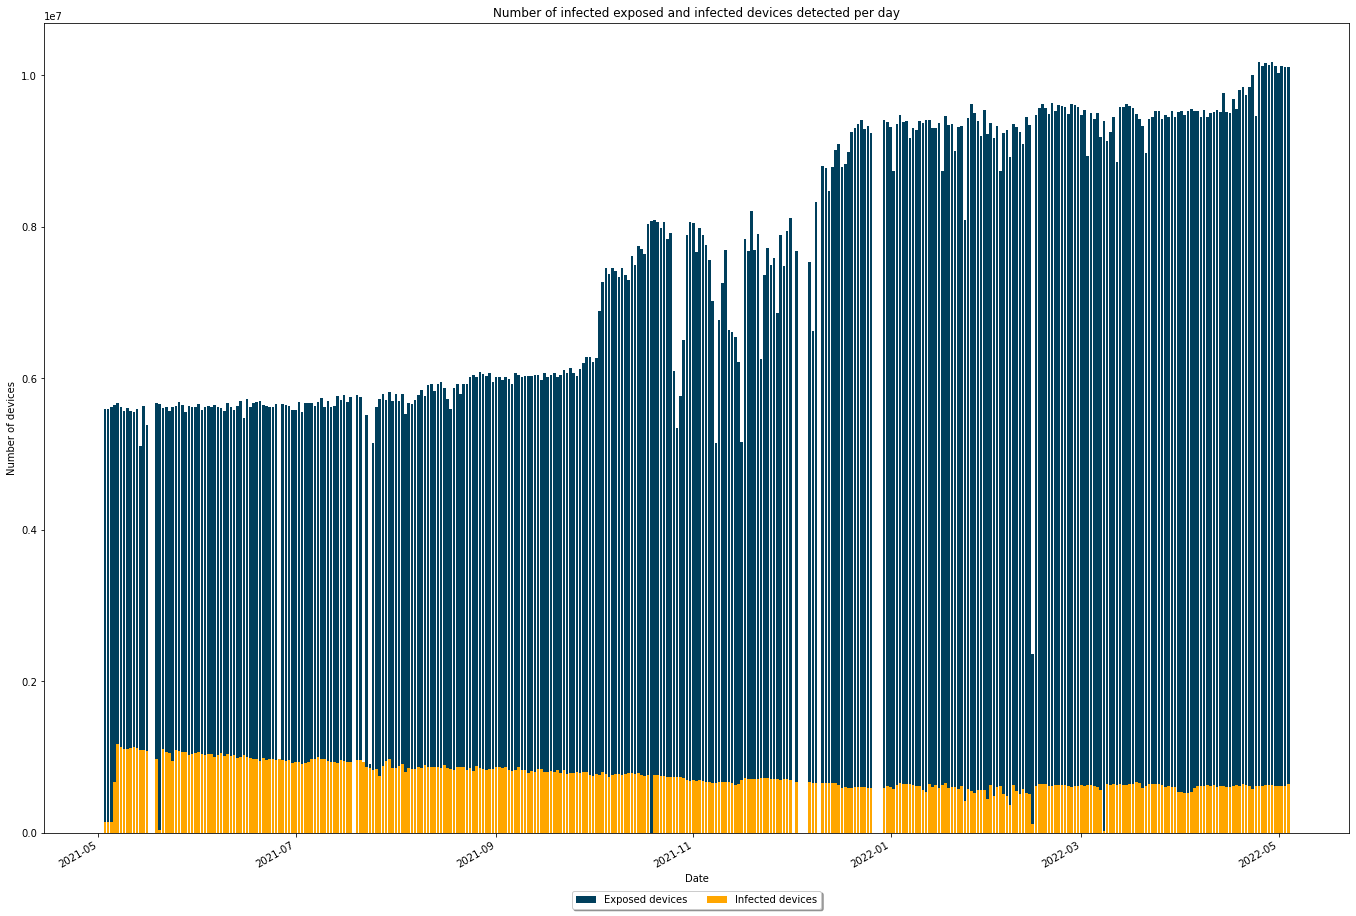

In [17]:
colors = ['#003f5c', '#ffa600']

plt.rcParams["figure.figsize"] = (23.38, 16.54)
fig, ax = plt.subplots()

width = 0.8

m_dates = mdates.num2date(mdates.datestr2num(dates))

bottom = df_exposed['count']
ax.bar(m_dates, bottom, width=width, label='Exposed devices', color=colors[0])
ax.bar(m_dates, df_infected['count'], width=width, label='Infected devices', color=colors[1])

ax.set_title("Number of infected exposed and infected devices detected per day")
ax.set_xlabel('Date')
ax.set_ylabel('Number of devices')

ax.legend(bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=2, fancybox=True, shadow=True)

fig.autofmt_xdate()

plt.savefig('../images/exposed-vs-infections.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2, dpi=300)
plt.show()